# Home Assignment No. 2: Part 2 (Theory)

In this part of the homework you are to solve several simple theoretical problems related to machine learning algorithms.
* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**.
* Your solution must me **COMPLETE**, i.e. contain all required formulas/proofs/detailed explanations.
* You must write your solution for any problem right after the words **YOUR SOLUTION**. Attaching pictures of your handwriting is allowed, but **highly discouraged**.
## $\LaTeX$ in Jupyter
Jupyter has constantly improving $\LaTeX$ support. Below are the basic methods to
write **neat, tidy, and well typeset** equations in your notebooks:
* to write an **inline** equation use 
```markdown
$ you latex equation here $
```
* to write an equation, that is **displayed on a separate line** use 
```markdown
$$ you latex equation here $$
```
* to write a **block of equations** use 
```markdown
\begin{align}
    left-hand-side
        &= right-hand-side on line 1
        \\
        &= right-hand-side on line 2
        \\
        &= right-hand-side on the last line
\end{align}
```
The **ampersand** (`&`) aligns the equations horizontally and the **double backslash**
(`\\`) creates a new line.

# Task1. Bayesian methods (1 point)

For a dataset $D =(X,y) =\{(x_i,y_i)\}^m_{i=1}$, $x_i \in \mathbb{R}^d$, $y_i\in\mathbb{R}$ it is known,that 
$$y_i = w^T x_i + \epsilon$$
where $\epsilon \sim N(0,\sigma^2)$, $w  \sim N(0,\alpha I)$ . Suppose that $X^T X =I$, where $I$ is the identity matrix. Derive MAP estimation for $w$.

### Your solution

Probabilistic model of the problem can be expressed as follows:

$$
p(y|x,w,\beta) = \mathcal{N}(y|f(x,w),\sigma^2)
$$

And posteriory can be expressed as follows:

$$p(w|X_m,Y_m,\alpha,\beta) \sim p(Y_m|X_m,w,\beta) \times p(w|\alpha)$$

Wich can be converted to  optimization problem:

$$\hat{w} = \underset{w}{\operatorname{argmax}} [ \space  p(Y_m|X_m,w,\beta) \times p(w|\alpha)]$$


$$\hat{w} = \underset{w}{\operatorname{argmax}} [ \log  p(Y_m|X_m,w,\beta) + \log p(w|\alpha)]$$

Following manipulatios below we can write optimization problem into a form which is easier to deal with:

$$\log(  pY_m|X_m,w,\beta) = \log[\prod_{i=1}^m \mathcal{N}(y_i|f(x_i,w),\underbrace{\beta}_{\sigma^2})] = \log \prod_{i=1}^m \frac{1}{\sigma \sqrt{2 \pi}} \exp{( \frac{y_i - f(x_i,w)^2}{2\sigma^2} )} $$

$$\log(  pY_m|X_m,w,\beta) = \underbrace { \log \left(\frac{1}{\sigma \sqrt{2\pi}}\right)^m }_{C_1 } + \sum_{i=1}^m \log \left( e^{- \frac{(y_i - f(x_i,w))^2}{2 \sigma^2}} \right)
$$

$$
\log(  pY_m|X_m,w,\beta) = C_1 - \frac{1}{2\sigma^2} \sum_{i=1}^m( y_i - f(x_i,w))^2
$$


$$
\log(  pY_m|X_m,w,\beta) = C_1 - \frac{1}{2\sigma^2} || Y - XW||_2^2
$$


$$
\log p(w|\alpha) =\log \mathcal{N}(w|0,\alpha I)
$$

$$
\log p(w|\alpha)  = \underbrace{\log \left(\frac{1}{2\pi\alpha } \right)^d}_{C_2} + \log \prod_{i=1}^d e^{\frac{-w_iw_i^T}{2\alpha}}
$$


$$
\log p(w|\alpha) = C_2 + \sum_{i=1}^d log( e^{\frac{-w_iw_i^T}{2\alpha}})
$$


$$
\log p(w|\alpha) = C_2 - \frac{1}{2\alpha}||W||_2^2
$$

The optimzation is reduced to the following from where the constants $ C_1, C_2 $ can be discared as they do not effect argmax and the argmax is effectively converted to argmin in order to get rid of minus terms

$$
\hat{w} = \underset{w}{\operatorname{argmax}} [ C_1 - \frac{1}{2\sigma^2} || Y - XW||_2^2 + C_2 - \frac{1}{2\alpha}||W||_2^2]
$$

$$
\hat{w} = \underset{w}{\operatorname{argmin}} [  \frac{1}{2\sigma^2} || Y - XW||_2^2 +  \frac{1}{2\alpha}||W||_2^2]
$$

And the valeus of W that minimize the fuction are found as below:
$$
\bigtriangledown_w \left( \frac{1}{2\sigma^2} || Y - XW||_2^2 +  \frac{1}{2\alpha}||W||_2^2 \right) = \frac{1}{\sigma^2}X^T(XW-Y)+\frac{1}{\alpha}W
$$

$$
\frac{1}{\sigma^2}X^T(XW-Y)+\frac{1}{\alpha}W = 0
$$

$$
W  = (XX^T + \frac{\sigma^2}{\alpha}I)^{-1}X^TY = \frac{1}{1+\frac{\sigma^2}{\alpha}}X^TY
$$

# Task 2. Gaussian Processes 1 (1 point)

Let $\sigma_n(\mathbf{x}_*)$ be a predictive variance at point $\mathbf{x}_*$ of a Gaussian Process $f_n$ with zero mean and covariance $k(\cdot,\cdot)$ that was built using first $n$ training points.
Prove that for $\forall \mathbf{x}_*$ it holds
$$
    \sigma_{n}(\mathbf{x}_*) \leq \sigma_{n-1}(\mathbf{x}_*).
$$





### Your solution


**Before you start checking this question I want to point out the questions in this homework are  not just one step solutions as you have said in the canvas discussions. In fact, most of the question require deep mathemathical proofs** 


Writing following equation holds true for posterior variance of a Gaussian Process:
$$
\sigma_n({\bf{x}_*}) = k({\bf{x}_*},{\bf{x}_*}) - {\bf{k_*}}^T(K_n + \sigma^2I_n)^{-1}{\bf{k_*}}
$$

What we really want to do is to prove that the second term of the expression above for $\sigma_{n-1}(\mathbf{x}_*)$ is smaller than for $\sigma_{n}(\mathbf{x}_*)$. From equation above can ignore $ k({\bf{x}_*},{\bf{x}_*})$ since it's the same for $\sigma_{n-1}(\mathbf{x}_*)$. Let's find ${\bf{k_*}}^T(K_n + \sigma^2I_n)^{-1}{\bf{k_*}}$ using the next lemma:

$$
\begin{align}
A = \begin{pmatrix} P & Q \\ R & S \end{pmatrix}, \qquad A^{-1} = \begin{pmatrix} \tilde P & \tilde Q \\ \tilde R & \tilde S \end{pmatrix},
\end{align}
$$

$$
\begin{align}
\tilde P & = P^{-1} + P^{-1}QMRP^{-1},\\
\tilde Q & = -P^{-1}QM,\\
\tilde R & = -MRP^{-1},\\
\tilde S & = M,\\
M & =  (S - RP^{-1}Q)^{-1}.\\
\end{align}
$$

Gramm matric can be decomposed as below, where $x'$ is $n^{th}$ train point:
$$
\begin{align}
K_n + \sigma^2 I_n = 
\begin{pmatrix}
K_{n-1} + \sigma^2 I_{n-1} & k_{n-1}(x')\\k_{n-1}(x')^\top & k(x',x') + \sigma^2
\end{pmatrix}
\end{align}
$$

Using provided lemma above the inverse follows as


$$
\begin{align}
(K_n + \sigma^2 I_n)^{-1} = \begin{pmatrix}\kappa + \kappa k_{n-1}(x')Mk_{n-1}(x')^\top\kappa & -\kappa k_{n-1}(x')M \\ -Mk_{n-1}(x')^\top \kappa & M \end{pmatrix},
\end{align}
$$

$$
\begin{align}
M & = (k(x', x') + \sigma^2 - k_{n-1}(x')^\top(K_{n-1} + \sigma^2I_{n-1})^{-1}k_{n-1}(x'))^{-1}, \\
\kappa & = (K_{n-1} + \sigma^2I_{n-1})^{-1}
\end{align}
$$


Simplyfing $(K_n + \sigma^2 I_n)^{-1}$ by multiplyng the terms:

$$
\begin{align}
{\bf{k_*}}^T(K_n + \sigma^2I_n)^{-1}{\bf{k_*}} = & \begin{pmatrix}k_{n-1}(x^*)\\k'(x^*)\end{pmatrix}^\top\begin{pmatrix}\kappa + \kappa k_{n-1}(x')Mk_{n-1}(x')^\top\kappa & -\kappa k_{n-1}(x')M \\ -Mk_{n-1}(x')^\top\kappa  & M \end{pmatrix}\begin{pmatrix}k_{n-1}(x^*)\\k'(x^*)\end{pmatrix}\\
& = \begin{pmatrix} k_{n-1}^\top(x^*)\kappa + k_{n-1}^\top(x^*)\kappa k_{n-1}(x')Mk_{n-1}(x')^\top\kappa - k'(x^*)Mk_{n-1}(x')^\top \kappa \\ -k_{n-1}^\top(x^*)\kappa k_{n-1}(x')M + k'(x^*)M \end{pmatrix} ^\top
\begin{pmatrix}k_{n-1}(x^*)\\k'(x^*)\end{pmatrix}
\end{align}
$$

$$
\begin{align}
{\bf{k_*}}^T(K_n + \sigma^2I_n)^{-1}{\bf{k_*}} & = k_{n-1}^\top(x^*)\kappa k_{n-1}(x^*) + k_{n-1}^\top(x^*)\kappa k_{n-1}(x')Mk_{n-1}(x')^\top\kappa k_{n-1}(x^*)\\
& - k'(x^*)Mk_{n-1}(x')^\top\kappa k_{n-1}(x^*) - k_{n-1}(x^*)^\top\kappa k_{n-1}(x')Mk'(x^*) + k'(x^*)Mk'(x^*).
\end{align}
$$


Where $ \kappa = (K_{n-1} + \sigma^2 I_{n-1})^{-1}$ as before and $k'(x^*) = k(x',x^*)$. As the fist term of the above expresson relates to  $\sigma_{n-1}(\mathbf{x}_*)$ what needs to be done is to show that the following terms are noen-negative for $    \sigma_{n}(\mathbf{x}_*) \leq \sigma_{n-1}(\mathbf{x}_*)$ to hold 

$$
\begin{align}
{\bf{k_*}}^T(K_n + \sigma^2I_n)^{-1}{\bf{k_*}} & = k_{n-1}^\top(x^*)\kappa k_{n-1}(x^*) + (\alpha - k'(x^*))^2\\
& = k_{n-1}(x^*)^\top(K_{n-1} + \sigma^2I_{n-1})^{-1}k_{n-1}(x^*) + \tfrac{1}{M}(\alpha - k'(x^*))^2\\
& \leq k_{n-1}(x^*)^\top(K_{n-1} + \sigma^2I_{n-1})^{-1}k_{n-1}(x^*).
\end{align}
$$

$$\sigma_{n}(\mathbf{x}_*) \leq \sigma_{n-1}(\mathbf{x}_*).
$$
Where $\alpha = k_{n-1}^T(x^*)\kappa k_{n-1}(x')$. The above expression holds true when $\tfrac{1}{M}(k_{n-1}^\top(x^*)(K_{n-1} + \sigma^2I_{n-1})^{-1} k_{n-1}(x') - k(x^*, x'))$ is non-negative




The solution to his problem could be found [here](https://stats.stackexchange.com/questions/409980/gaussian-process-why-adding-data-points-cannot-increase-the-predictive-bias/41)

# Task 3. Gaussian Processes 2 (1 point)

Consider you have gaussian distribution on $R$ with zero mean and differentiable by arguments covariation funtion $k(x, \tilde{x})$.Get an expression for the correlation between the implementation of a Gaussian process  $y(x) ∼ GP (0, k(x, x ^{\prime}))$ and its derivative $\frac{\partial y(\tilde x)}{\partial \tilde x}$ .

### Your solution

Let us define pearson correlation as follows:
$$
p(x,y) = \frac{cov(x,y)}{\sigma_x \sigma_y}
$$
and where: 

$cov(x,y) = \mathbb{E}(x,y) - \mathbb{E}(x)\mathbb{E}(y)$

What we need to do is to express $x$ and $y$ in terms of $y(x)$ and $\frac{\partial y(\tilde x)}{\partial \tilde x}$ 



$$
cov(y(x),\frac{\partial y(\tilde x)}{\partial \tilde x} ) = \mathbb{E}(y(x),\frac{\partial y(\tilde x)}{\partial \tilde x} ) - \mathbb{E}(y(x))\mathbb{E}(\frac{\partial y(\tilde x)}{\partial \tilde x})\\
= \mathbb{E}(y(x),\frac{\partial y(\tilde x)}{\partial \tilde x} ) -0\times\mathbb{E}(\frac{\partial y(\tilde x)}{\partial \tilde x} )
\\
= \mathbb{E}(y(x),\frac{\partial y(\tilde x)}{\partial \tilde x} )\\
=\frac{\partial }{\partial \tilde x} \mathbb{E}(y(x),y(\tilde x) ) = \frac{\partial }{\partial \tilde x} \kappa(x,\tilde x)
$$


$\mathbb{E}(y(x)) = 0$, becasue the mean of the $GP$ is 0. Let's now rewerite the $\sigma$'s:

$$\sigma_{y(x)}^2 = cov(y(x),y(\tilde x))= \kappa(x,x')$$

$$\sigma_{\frac{\partial y(\tilde x)}{\partial \tilde x} }^2 = \mathbb{E}(\frac{\partial y(\tilde x)}{\partial \tilde x},\frac{\partial y(\tilde x)}{\partial \tilde x}) = \frac{\partial^2}{\partial \tilde x^2} \mathbb{E}(y(\tilde x),y(\tilde x)) = \frac{\partial^2}{\partial \tilde x^2}  \kappa (\tilde x,\tilde x)$$

Now let's rewrite the pearson correlation for our GP:
$$
p(y(x), \frac{\partial y(\tilde x)}{\partial \tilde x}) = \frac{ \frac{\partial }{\partial \tilde x} \kappa(x,\tilde x)}{\sqrt{ \kappa(x,x')} \times \sqrt{\frac{\partial^2}{\partial \tilde x^2}  \kappa (\tilde x,\tilde x)} }
$$



# Task 4. Kernel theory (1 point)

Let $K(x, x'):\mathcal{X}\times \mathcal{X}\rightarrow \mathbb{R}$ be a PDS kernel,
and $\phi\colon \mathcal{X} \to \mathcal{H}$ its <b>unknown </b> feature mapping. For $x,x'\in\mathcal{X}$ derive the formula for the **distance** between $
\phi(x)$ and $\phi(x')$ in $\mathcal{H}$.


Let us define the following:

$$
||\phi(x)  - \phi(x')||_2^2  = < \phi(x) - \phi(x'),\phi(x) - \phi(x')>  
$$


$$
< \phi(x) - \phi(x'),\phi(x) - \phi(x')> = <\phi(x),\phi(x)> + <\phi(x'),\phi(x')> - 2 <\phi(x),\phi(x')>
$$

$$
||\phi(x)  - \phi(x')||_2^2 =  K(x,x)+K(x',x')-2K(x,x')
$$

We know that Eucledian distance is: $  \sqrt{||\phi(x)  - \phi(x')||_2^2 }  = \sqrt{ K(x,x)+K(x',x')-2K(x,x')} $

### Your solution

# Task 5. Naive Gradient Boosting Regression (1 points)

You are given a regression dataset, consisting of 5 samples with 1-dimensional feature vector $X$ and scalar target vector $y \in \mathbb{R}$:

|  x   |  y   | 
|:----:|:----:| 
|  10  |  1   | 
|  32  |  9   | 
|  46  |  13  | 
|  54  |  16  | 
|  63  |  23  | 

In this task you are asked to implement **3 steps of Gradient Boosting Regression** with decision tree stumps as the learners $h_0, h_1, h_2$. 

In order to complete this task:
1. Refer to the slides on naive boosting for regression in **Lecture 8**.
2. Assume that the initial model $f_0$ is the mean of the feature vector $X$
3. According to the algorithm on the boosting approach for regression from **1.**, compute the residuals
4. Manually, find a suitable split among the $x_i$ for each decision tree weak model $h_t(X)$, which minimizes the loss function:

$$L_{\text{split_i}} = \frac{\text{Var}_{left\_split}*N_{1} + \text{Var}_{right\_split}*N_{2}}{N_{1}+N_{2}}$$

where  $\text{Var}$ is the variance of the values contained in each leaf, $N_1$ is the number of target values $y$ in the left leaf, $N_{2}$ - in the right leaf

5. Perform the Gradient Boosting step on the ensemble model $f_t$ with the resulting decision tree stump predictions (assume that the learning rate $lr=1.0$).

**Note on Decision Tree Stumps:** A decision tree stump is a decision tree, which consists only of the root and its immediate leaves. In case of this task, at each iteration you are asked to consider 5 different variants of the decision tree stumps $h_t^i$ - one variant for each of the split candidates $x_i$. You should choose the variant that minimizes the loss written above. The two leaves of the tree are formed according to the rule:

```python
if x_i < split:
    target_value -> left leaf
elif x_i >= split:
    target_value -> right leaf
```
**HINT:** Think about what should be `target_value` equal to in case of Gradient Boosting Regression.

The prediction of decision tree stump $h_t(x_i)$ is the mean of the values of the according leaf.



In [103]:
import pandas as pd 
import numpy as np
df = pd.DataFrame(index=[1,2,3,4,5],columns=['x','y','f0','y-f0','L0','h0','f1','y-f1','L1','h1','f2','y-f2','L2','h2','F3'])

df.x=[10,32,46,54,63]
df.y=[1,9,13,16,23]
df.f0=np.mean(df.y)
df['y-f0']=df.y-df.f0

def loss(df,nL,res):
  for i,split in enumerate(df.x):
      N1 = len(df.x[df.x < split])
      N2 = len(df.x[df.x >= split])
      var_l = np.var(df[res][df.x < split])
      if N1==0:
        var_l = 0
      var_r = np.var(df[res][df.x >= split])
      if N2 == 0:
        var_r = 0
      L = (var_l*N1 + var_r*N2)/(N1+N2)
      df[nL][i+1] = L
  mloss = np.argmin(df.L0)
  return df,mloss

df,mspit = loss(df,'L0','y-f0')
df.h0[:2] = np.mean(df['y-f0'][:2])
df.h0[2:] = np.mean(df['y-f0'][2:])
df.f1 = df.h0+df.f0
df['y-f1'] = df.y - df.f1
df,_=loss(df,'L1','y-f1')
df.h1[:4] = np.mean(df['y-f1'][:4])
df.h1[4:] = np.mean(df['y-f1'][4:])
df.f2 = df.f1+df.h1
df['y-f2'] = df.y-df.f2
df,_ = loss(df,'L2','y-f2')
df.h2[:1] = np.mean(df['y-f2'][:1])
df.h2[1:] = np.mean(df['y-f2'][1:])
df.F3 = df.h2+df.f2
df.round(decimals=2)


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is tr

,x,y,f0,y-f0,L0,h0,f1,y-f1,L1,h1,f2,y-f2,L2,h2,F3
1,10,1,12.4,-11.4,53.44,-7.4,5,-4,16.9333,-1.41667,3.58333,-2.58333,8.90556,-2.58333,1
2,32,9,12.4,-3.4,20.95,-7.4,5,4,12.9333,-1.41667,3.58333,5.41667,7.23715,0.645833,4.22917
3,46,13,12.4,0.6,16.9333,4.93333,17.3333,-4.33333,16.9333,-1.41667,15.9167,-2.91667,7.56759,0.645833,16.5625
4,54,16,12.4,3.6,19.8333,4.93333,17.3333,-1.33333,13.8037,-1.41667,15.9167,0.0833333,8.9044,0.645833,16.5625
5,63,23,12.4,10.6,25.35,4.93333,17.3333,5.66667,8.90556,5.66667,23,0,8.90556,0.645833,23.6458


**The task**: My table is above

* Fill in the table - round the values of table up to the second digit after decimal point:


|   x  |   y  |$f_0$|$$y - f_0$$|$L$|$h_0$|$f_1$|$$y-f_1$$|$L$|$h_1$|$f_2$|$$y - f_2$$|$L$|$h_2$|$F_3$|
|------|------|-----|-----------|---|-----|-----|---------|---|-----|-----|-----------|---|-----|-----|
|  10  |  1   |  41 |  12.4      |-11.4 |  53.44  |  -7.4  |5     |-4     |  0  |  0  |    0      | 0 |  0  |  0  | 
|  32  |  9   |  41 |  12.4      | -3.4 |  20.95  |  -7.4  |5     | 4     |  0  |  0  |    0      | 0 |  0  |  0  |
|  46  |  13  |  41 |  12.4      | 0.6  |  16.93  |  4.93  |17.33 | -4.33 |  0  |  0  |    0      | 0 |  0  |  0  |
|  54  |  16  |  41 |  12.4      | 3.6  |  19.83  |  4.93  |17.33 | -1.33 |  0  |  0  |    0      | 0 |  0  |  0  |
|  63  |  23  |  41 |  12.4      | 10.6 |  25.35  |  4.93  |17.33 | 5.66  |  0  |  0  |    0      | 0 |  0  |  0  |


where $L$ is the loss, calculated by the formula for decision tree stumps above, for each of the 5 split variants of the decision tree stump at each iteration
* Write down the splits (the feature values) you have found for each of the tree stumps

* Insert the predictions of the full ensemble model and the split values, you have achieved after 3 iterations into the plotting cell below (**COPY AND PASTE** the last column from the table above and the splits list to the plotting cell below, instead of **#your solution**):

In [105]:
from statistics import mean 
import numpy as np
from itertools import groupby
import matplotlib.pyplot as plt

In [110]:
def plot_tree(x,F,stumps):
    x_range = np.arange(np.min(x), np.max(x)+1)
    x_r = []
    f_r = []
    stmps = [0] + stumps + [np.inf]
    for st in range(1,len(stmps)):
        x_r.extend([list(group) for k, group in groupby(x_range, lambda x: x<stmps[st] and x>=stmps[st-1]) if k])
        f_r.append([f_i for f_i,x_ii in zip(F,x) if x_ii<stmps[st] and x_ii>=stmps[st-1]])
    F_to_plot = []
    for ft in range(len(f_r)):
        #assert len(f_r) == len(x_r)
        if len(f_r[ft]) == 1:
            F_to_plot.extend([f_r[ft][0]]*len(x_r[ft]))
        elif len(f_r[ft]) > 1:
            F_to_plot.extend([mean(f_r[ft])]*len(x_r[ft]))
    return F_to_plot,x_range

## PLOTTING CELL##

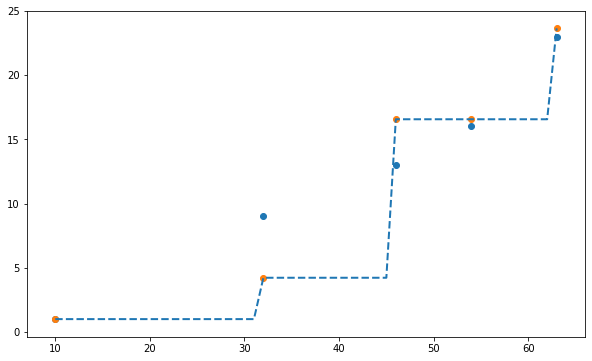

In [111]:
x = [10,32,46,54,63]
y = [1, 9, 13, 16, 23]

#note that the order of F(x_i) should be corresponding to the order of x_i in the table

############ INSERT YOUR SOLUTION HERE###############
F3 = [1,4.22,16.56,16.56,23.64]
splits = [46,63,32]

boosted_F_plot,x_range = plot_tree(x, F3, stumps = list(np.sort(splits)))
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.scatter(x,y, label = 'original')
ax.scatter(x, F3, label = 'predicted')
ax.plot(x_range,boosted_F_plot,'--', linewidth=2, label = 'composite function')
plt.show()

# Task 6. AdaBoost (1 point)

For each of the following cases,explain how AdaBoost, as given in **Lecture 7**, will treat a weak hypothesis $h_t$ with weighted error $N_t(h_t , w_t )$. Also, in each case, explain why this behavior takes place.
1. $N_t = \frac{1}{2}$
2. $N_t > \frac{1}{2}$
3. $N_t = 0$

### Your solution:
1. $ N_t = \frac{1}{2}, \space \alpha_t = 0 $, thus we discart $h_t$ from $\sum_i^T \alpha_t * h_t$ the result does not change form $h_t$

2. $ N_t > \frac{1}{2}, \alpha_t \space $ is always equal to some negative number and thus it's predicticitons are always inversed. The more nagative $\alpha_t$ is the more correct predictions $h_t$ will make through inversion.

3. $ N_t = 0 $, means that the $h_t$ has made no mistakes, thus is a perfect classifier. The machine for $ N_t = 0, \space \frac{1-N_t}{N_t}  = \epsilon, $ where $\epsilon$ is a tiny number thus $\alpha_t $ is a very big number which means that $ h_t $ has a massive weight in the final prediction. Also, weights $W_{i,t+1}$ will not change since $h_t$ has made no mistake